NV Games, an emerging game developer, aims to gain a competitive edge through data analysis. This includes examining various game features such as reviews, platforms, ratings, and sales. In the previous unit, they cleaned and organized this data. Now, they hope to explore it further to identify correlations between these features and global sales, helping them optimize their strategy by focusing on the most impactful features.

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing


Turned the csv into a dataframe.

In [43]:
df = pd.read_csv('merged_df.csv',index_col = 0)


Reviewed the dataframe using .head(), .shape, and .info()

In [45]:
df.head()

,Game,Release Date,Rating,Genre,Price (USD),Platform,Publisher,Developer,Metacritic Score,Player Score,NA Sales (Millions),Global Sales (Millions)
GameID,,,,,,,,,,,,
12140,Max Payne,2011-01-06,M,Action,3.49,PS2,Take-Two Interactive,Rockstar Toronto,89,8.5,1.99,3.31
12140,Max Payne,2011-01-06,M,Action,3.49,XB,Take-Two Interactive,neo Software,89,8.3,0.98,1.22
12140,Max Payne,2011-01-06,M,Action,3.49,GBA,Take-Two Interactive,Mobius Entertainment,89,7.8,0.02,0.03
748490,The Legend of Heroes: Trails of Cold Steel II,2018-02-14,T,RPG,39.99,PSV,Nippon Ichi Software,Falcom,81,7.3,0.02,0.19
748490,The Legend of Heroes: Trails of Cold Steel II,2018-02-14,T,RPG,39.99,PS3,Nippon Ichi Software,Falcom,81,7.8,0.02,0.15


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 12140 to 224600
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game                     458 non-null    object 
 1   Release Date             458 non-null    object 
 2   Rating                   458 non-null    object 
 3   Genre                    458 non-null    object 
 4   Price (USD)              458 non-null    float64
 5   Platform                 458 non-null    object 
 6   Publisher                458 non-null    object 
 7   Developer                458 non-null    object 
 8   Metacritic Score         458 non-null    int64  
 9   Player Score             458 non-null    float64
 10  NA Sales (Millions)      458 non-null    float64
 11  Global Sales (Millions)  458 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 46.5+ KB


In [47]:
df.shape

(458, 12)

Changed the datatype of Release Date from object to datetime

In [49]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 12140 to 224600
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Game                     458 non-null    object        
 1   Release Date             458 non-null    datetime64[ns]
 2   Rating                   458 non-null    object        
 3   Genre                    458 non-null    object        
 4   Price (USD)              458 non-null    float64       
 5   Platform                 458 non-null    object        
 6   Publisher                458 non-null    object        
 7   Developer                458 non-null    object        
 8   Metacritic Score         458 non-null    int64         
 9   Player Score             458 non-null    float64       
 10  NA Sales (Millions)      458 non-null    float64       
 11  Global Sales (Millions)  458 non-null    float64       
dtypes: datetime64[ns](1), float64(4), 

Review the Genre column by seeing how many unique genres there are and what those genres are.

In [52]:
df['Genre'].nunique()

43

In [53]:
df['Genre'].unique()

array(['Action', 'RPG', 'Action,RPG', 'Adventure', 'Adventure,Casual',
       'Action,Adventure', 'Simulation,Strategy', 'Simulation',
       'Simulation,Sports', 'Action,Casual,Indie,RPG,Simulation,Strategy',
       'Racing,Simulation,Sports', 'RPG,Simulation,Strategy', 'Racing',
       'Strategy', 'Action,Indie,RPG,Strategy',
       'Free to Play,Massively Multiplayer,RPG', 'Action,Strategy',
       'Adventure,Strategy', 'Action,RPG,Strategy',
       'Action,Adventure,Strategy', 'Casual,Simulation',
       'Action,Adventure,Casual', 'Action,Indie', 'Casual,Strategy',
       'RPG,Strategy', 'Action,Adventure,RPG',
       'Nudity,Violent,Action,Adventure,RPG', 'Action,Racing',
       'Action,Adventure,Indie,RPG', 'Casual,RPG', 'RPG,Casual',
       'Violent,Action,Adventure,RPG',
       'Action,Adventure,Simulation,Strategy', 'Action,Casual,Indie',
       'Indie,Simulation,Strategy', 'Racing,Simulation', 'Adventure,RPG',
       'Action,Simulation', 'Action,Adventure,Casual,Strategy',
  

Seeing how alot of games have more than one genre, I will simplify it so that each game just has the first genre listed.

In [55]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

Show the new unique values for the Genre column.

In [57]:
df['Genre'].unique()

array(['Action', 'RPG', 'Adventure', 'Simulation', 'Racing', 'Strategy',
       'Free to Play', 'Casual', 'Nudity', 'Violent', 'Indie', 'Sports'],
      dtype=object)

Analyze the Global Sales column by using .hist(), describe(), and value_counts().

<Axes: >

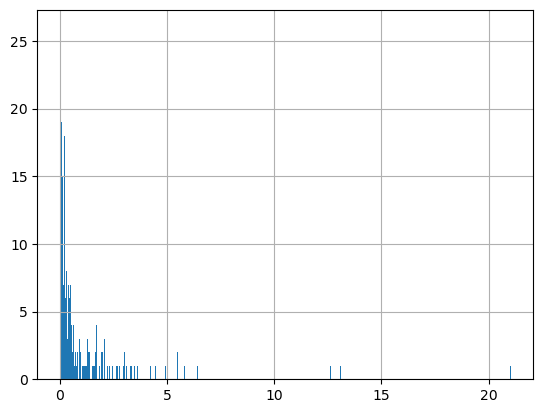

In [59]:
df['Global Sales (Millions)'].hist(bins = 1000)



In [60]:
df['Global Sales (Millions)'].describe()

count    458.000000
mean       1.009760
std        2.212256
min        0.010000
25%        0.130000
50%        0.335000
75%        0.937500
max       21.040000
Name: Global Sales (Millions), dtype: float64

In [61]:
df['Global Sales (Millions)'].value_counts()

Global Sales (Millions)
0.19    14
0.07    14
0.05    14
0.04    12
0.10    11
        ..
7.38     1
1.63     1
1.60     1
1.75     1
1.67     1
Name: count, Length: 179, dtype: int64

The analysis of the Global Sales column showed that there are outliers skewing the data, specifically 6 games that sold over $5 million. To improve data uniformity, I will drop those outliers. 

In [63]:
df = df[df['Global Sales (Millions)'] <= 5]

After dropping those outliers, you can see with the graph below that we get a better view of the data.

<Axes: >

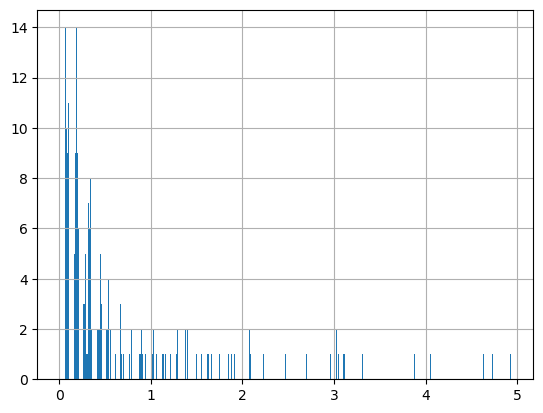

In [65]:
df['Global Sales (Millions)'].hist(bins= 1000)

Dropping those outliers also gives us a more realistic statistical measures.

In [67]:
df['Global Sales (Millions)'].describe()

count    442.000000
mean       0.679729
std        0.914713
min        0.010000
25%        0.120000
50%        0.320000
75%        0.820000
max        4.930000
Name: Global Sales (Millions), dtype: float64

Resetting the index so that GameID becomes a column instead of the index.

In [69]:
df.reset_index(inplace=True)


Using pairplot(), corr(), and heatmap()to see if I can find any correlation between the numeric columns.

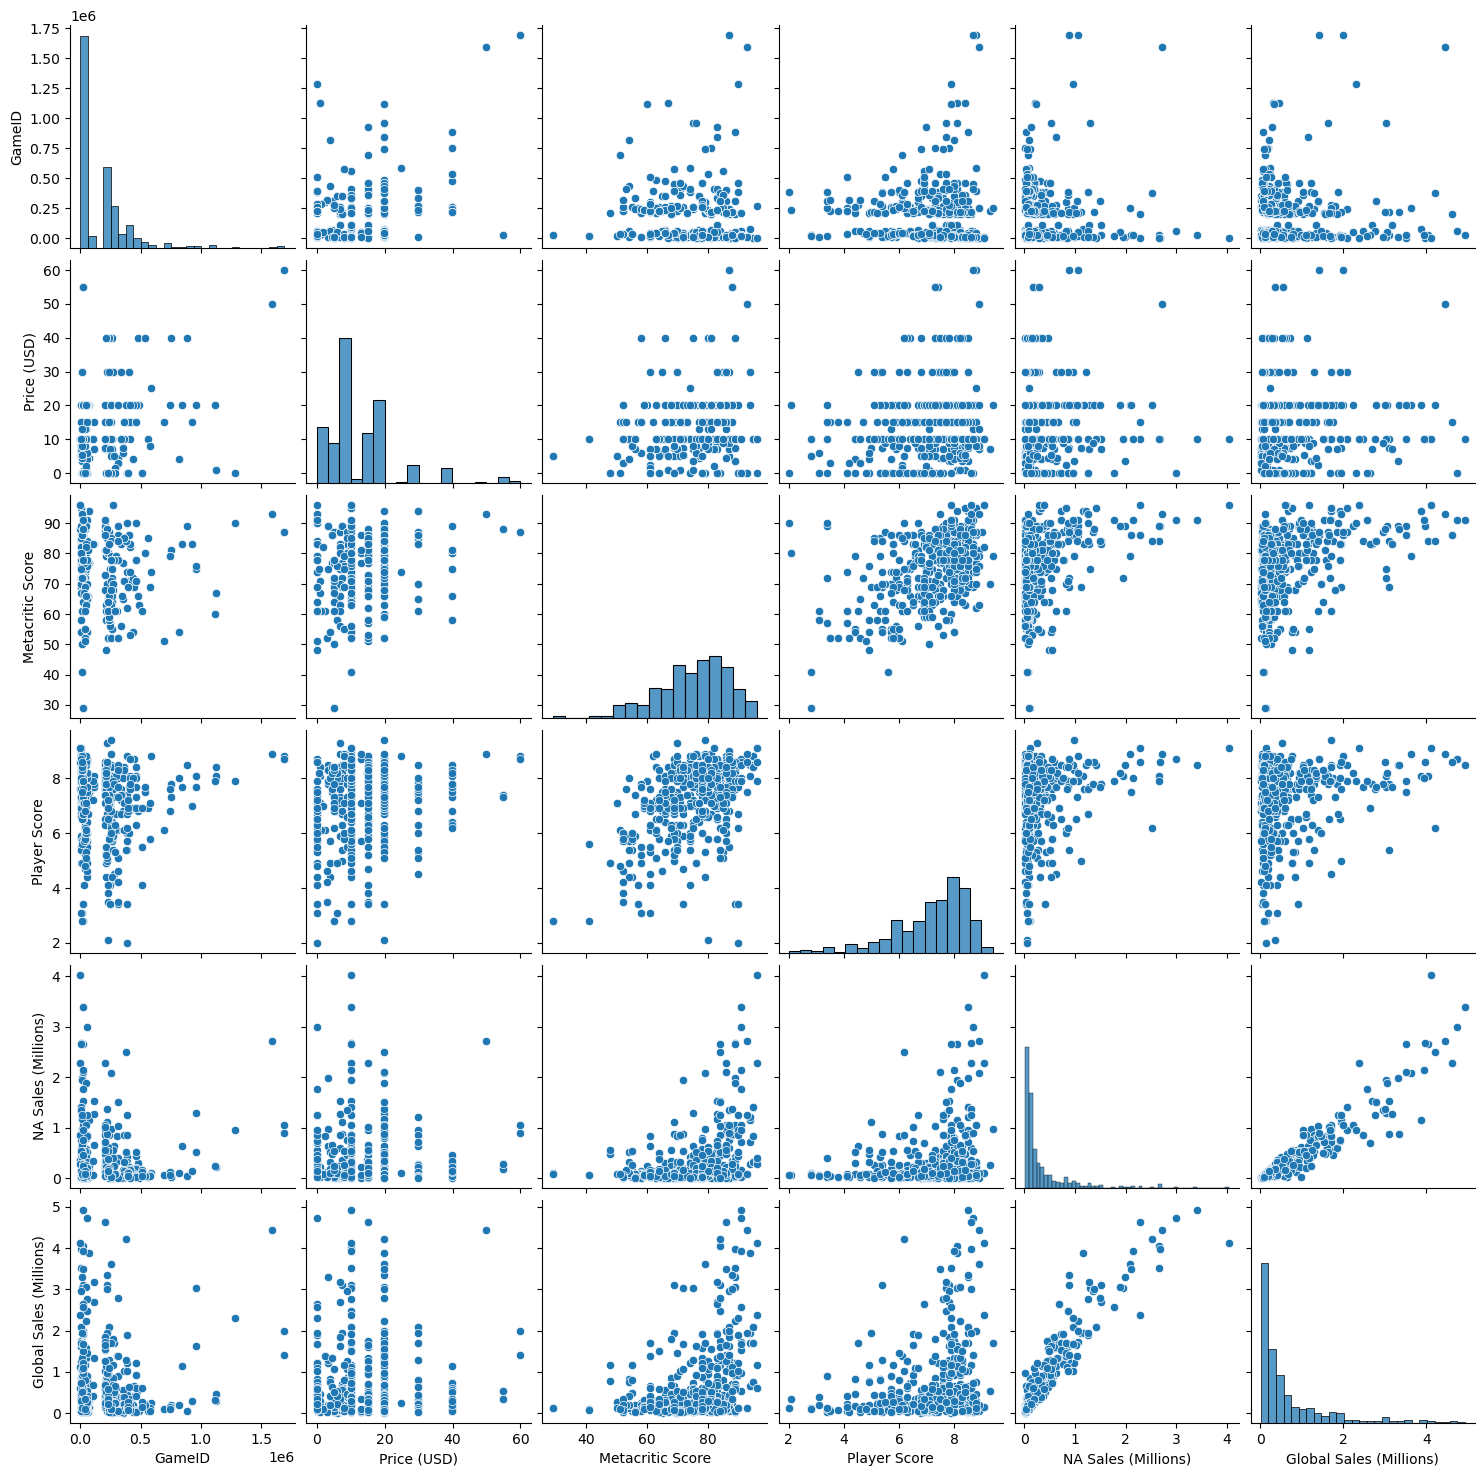

In [71]:
sns.pairplot(df)

Creating a new dataframe, numeric_df, with only numerical columns so that only numerical columns will be correlated.

In [73]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop(columns=['GameID'])

numeric_df.corr()

,Price (USD),Metacritic Score,Player Score,NA Sales (Millions),Global Sales (Millions)
Price (USD),1.000000,0.188216,0.158064,0.020523,0.035583
Metacritic Score,0.188216,1.000000,0.508452,0.400850,0.411978
Player Score,0.158064,0.508452,1.000000,0.257460,0.251242
NA Sales (Millions),0.020523,0.400850,0.257460,1.000000,0.939189
Global Sales (Millions),0.035583,0.411978,0.251242,0.939189,1.000000


<Axes: >

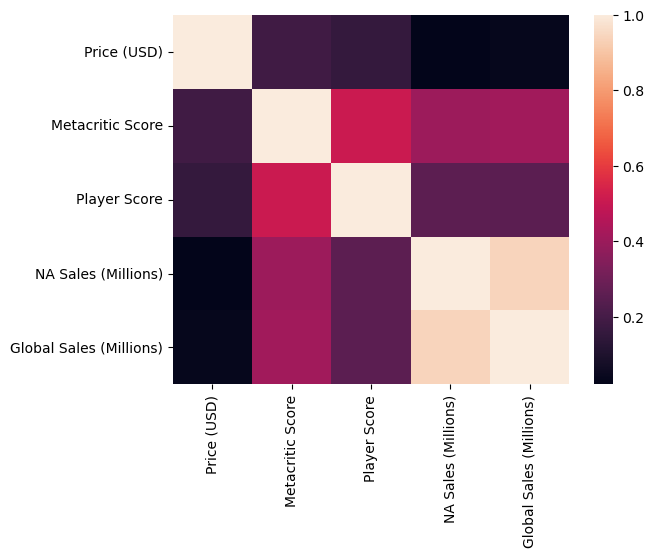

In [74]:
sns.heatmap(numeric_df.corr())

There appears to be a correlation between the columns NA Sales and Global Sales, as one would expect.

<Axes: xlabel='NA Sales (Millions)', ylabel='Global Sales (Millions)'>

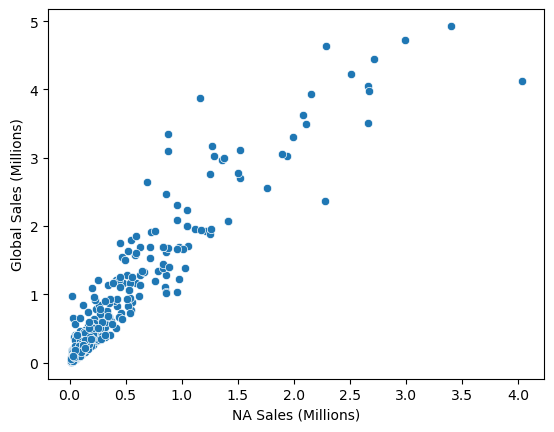

In [76]:
sns.scatterplot(x= 'NA Sales (Millions)',y= 'Global Sales (Millions)', data= df)

But more importantly, the non-sales column with the strongest correlation to Global Sales is Metacritic Score, with a correlation coefficient of .41.

<Axes: xlabel='Metacritic Score', ylabel='Global Sales (Millions)'>

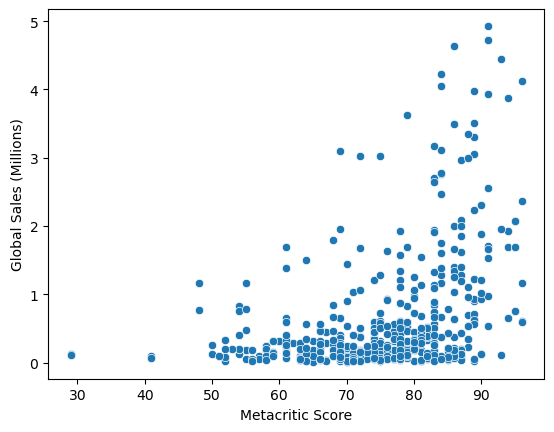

In [78]:
sns.scatterplot(x= 'Metacritic Score',y= 'Global Sales (Millions)', data= df)

To better visualize the correlation between the two variables, I will add a regression line and confidence intervals.

<Axes: xlabel='Metacritic Score', ylabel='Global Sales (Millions)'>

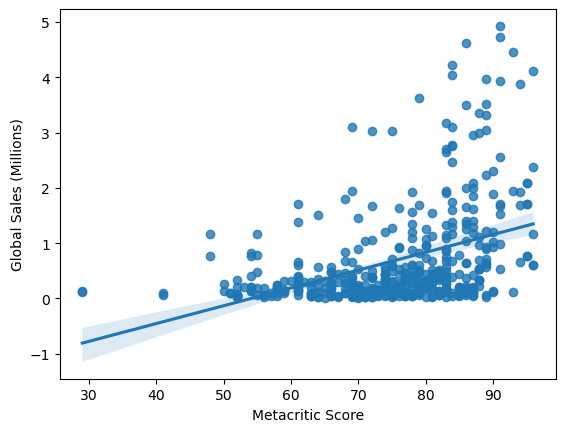

In [80]:
sns.regplot(x= 'Metacritic Score',y= 'Global Sales (Millions)', data= df)

Now I will plot the non-numeric columns to see if they have any correlation to Global Sales or Metacritic Score, starting with Rating.

<Axes: xlabel='Rating', ylabel='Global Sales (Millions)'>

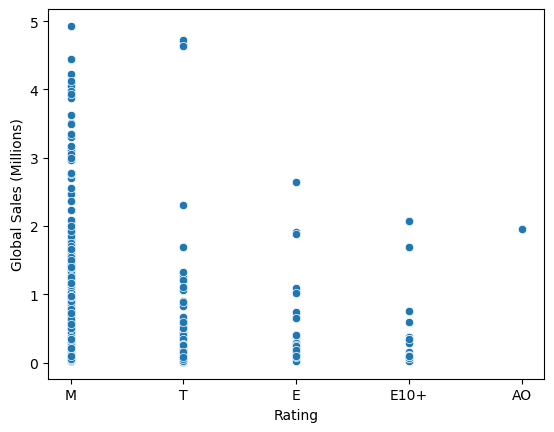

In [82]:
sns.scatterplot(x= 'Rating',y= 'Global Sales (Millions)', data= df)

The plot indicates that the majority of games are rated M and also sell the most units.

<Axes: xlabel='Rating', ylabel='Metacritic Score'>

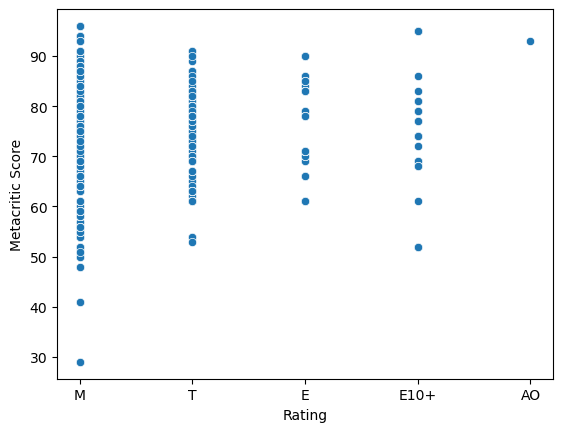

In [84]:
sns.scatterplot(x= 'Rating',y= 'Metacritic Score', data= df)

After review, the Metacritic Scores stay consistent across Ratings, with certain Ratings having more variety due to higher quantity.

Next, I will see if theres a correlation between Genre and Global Sales.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'RPG'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Simulation'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Strategy'),
  Text(6, 0, 'Free to Play'),
  Text(7, 0, 'Casual'),
  Text(8, 0, 'Nudity'),
  Text(9, 0, 'Violent'),
  Text(10, 0, 'Indie'),
  Text(11, 0, 'Sports')])

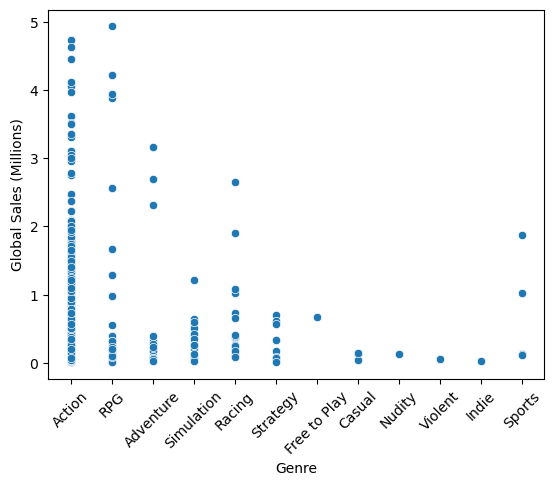

In [87]:
sns.scatterplot(x= 'Genre',y= 'Global Sales (Millions)', data= df)
plt.xticks(rotation=45)

Similar to the the rating M in the previous graphs, the Genre Action has the largest quantity and also highest overall sales.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'RPG'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Simulation'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Strategy'),
  Text(6, 0, 'Free to Play'),
  Text(7, 0, 'Casual'),
  Text(8, 0, 'Nudity'),
  Text(9, 0, 'Violent'),
  Text(10, 0, 'Indie'),
  Text(11, 0, 'Sports')])

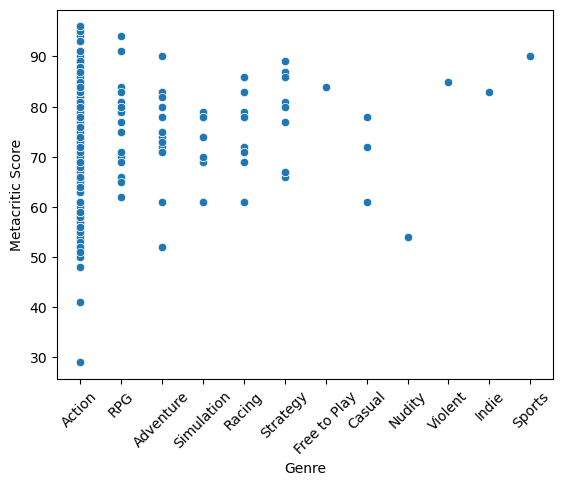

In [89]:
sns.scatterplot(x= 'Genre',y= 'Metacritic Score', data= df)
plt.xticks(rotation=45)

The Metacritic Scores stay consistent across most Genres, with certain Genres having more variety due to higher quantity.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'XB'),
  Text(2, 0, 'GBA'),
  Text(3, 0, 'PSV'),
  Text(4, 0, 'PS3'),
  Text(5, 0, 'X360'),
  Text(6, 0, 'PC'),
  Text(7, 0, 'PS4'),
  Text(8, 0, 'Wii'),
  Text(9, 0, 'XOne'),
  Text(10, 0, 'GC'),
  Text(11, 0, 'PSP'),
  Text(12, 0, 'DS'),
  Text(13, 0, 'PS'),
  Text(14, 0, 'WiiU'),
  Text(15, 0, '3DS')])

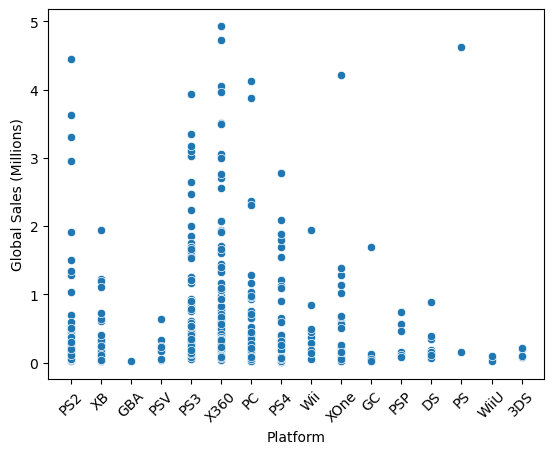

In [91]:
sns.scatterplot(x= 'Platform',y= 'Global Sales (Millions)', data= df)
plt.xticks(rotation=45)

The X360 is the Platform with the highest Global Sales in games, followed by the PS3.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'XB'),
  Text(2, 0, 'GBA'),
  Text(3, 0, 'PSV'),
  Text(4, 0, 'PS3'),
  Text(5, 0, 'X360'),
  Text(6, 0, 'PC'),
  Text(7, 0, 'PS4'),
  Text(8, 0, 'Wii'),
  Text(9, 0, 'XOne'),
  Text(10, 0, 'GC'),
  Text(11, 0, 'PSP'),
  Text(12, 0, 'DS'),
  Text(13, 0, 'PS'),
  Text(14, 0, 'WiiU'),
  Text(15, 0, '3DS')])

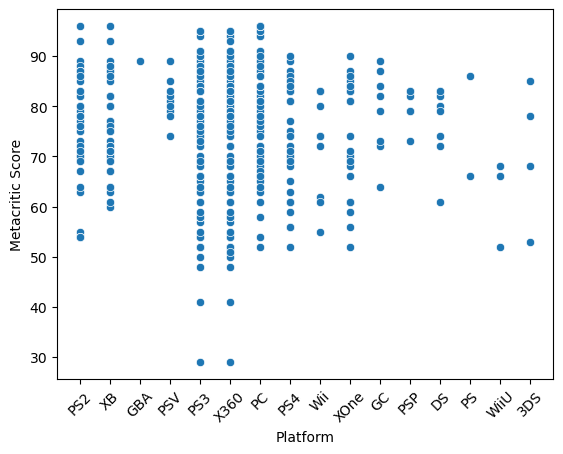

In [93]:
sns.scatterplot(x= 'Platform',y= 'Metacritic Score', data= df)
plt.xticks(rotation=45)

The Metacritic Scores stay consistent across most Platforms, with certain Platforms having more variety due to higher quantity, with the only exception being the PSV, with the highest average Metacrtic Score. There are also 2 score outliers, for both the PS3 and X360, that scored particularly low.

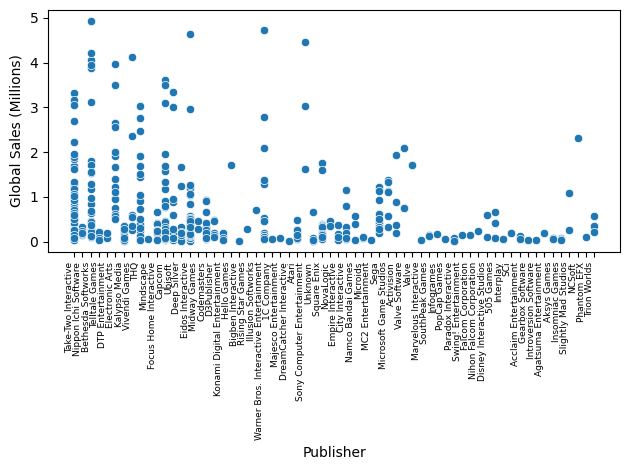

In [95]:
sns.scatterplot(x= 'Publisher' ,y= 'Global Sales (Millions)', data= df)
plt.xticks(rotation=90, ha= 'right', fontsize= 6.5)
plt.tight_layout()

Bethesda Softworks is the Publisher with the highest Global Sales, followed by Take-Two Interactive.

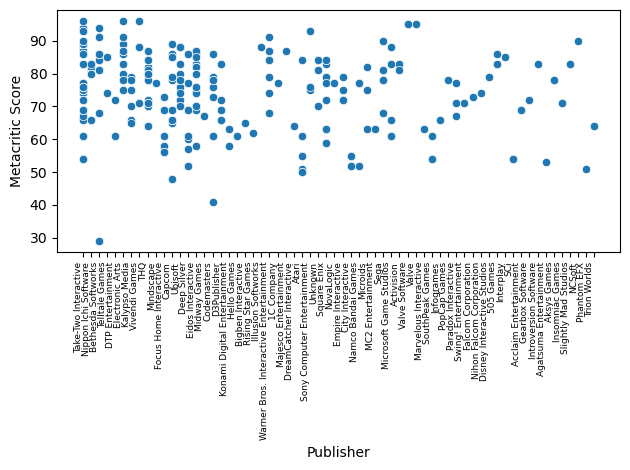

In [97]:
sns.scatterplot(x= 'Publisher',y= 'Metacritic Score', data= df)
plt.xticks(rotation=90, ha= 'right', fontsize= 6.5)
plt.tight_layout()

The Metacritic Scores stay consistent across most Publishers, with certain Publishers having more variety due to higher quantity. There are two outliers with particularly low scores, one with Bethesda Softworks and the other with Midway Games.

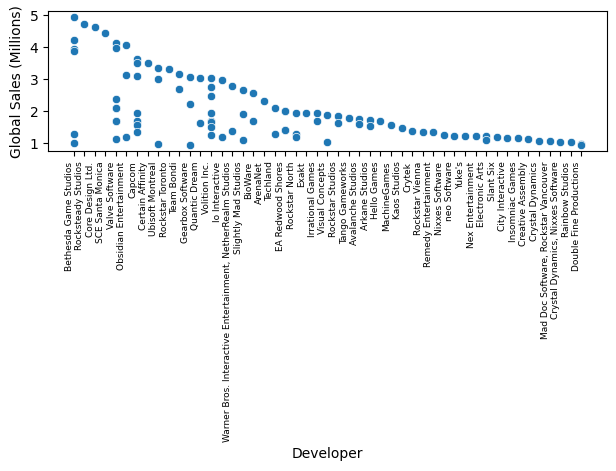

In [99]:
top_developers = df.nlargest(100, 'Global Sales (Millions)')

sns.scatterplot(x= 'Developer',y= 'Global Sales (Millions)', data= top_developers)
plt.xticks(rotation=90, ha= 'right', fontsize= 6.5)
plt.tight_layout()

There were too many Developers to plot so I narrowed it down to the top 100 based on Global Sales. The Developers with the most highest selling games were Bethesda Game Studios and Rocksteady Studios.

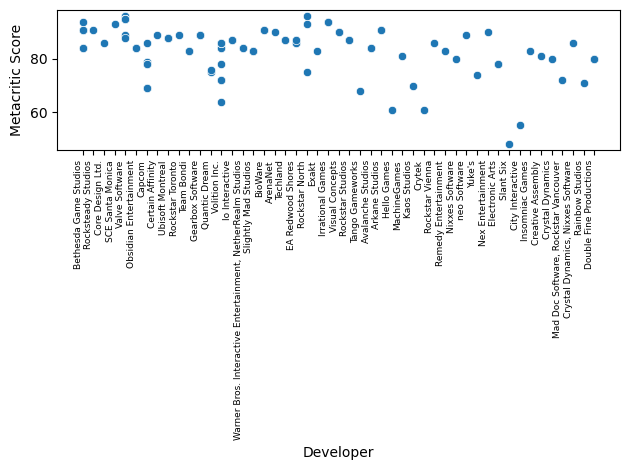

In [101]:
top_developers = df.nlargest(100, 'Global Sales (Millions)')

sns.scatterplot(x= 'Developer',y= 'Metacritic Score', data= top_developers)
plt.xticks(rotation=90, ha= 'right', fontsize= 6.5)
plt.tight_layout()

The Metacritic Scores stay consistent across most Developers, with certain Developers having more variety due to higher quantity. There are two outliers with particularly low scores, one with City Interactive and the other with Slant Six.

In conclusion, we were able to show that the strongest correlation to Global Sales, not including NA Sales, was Metacritic Scores, with a correlation coefficient of .41. Then we investigated if these two variables had any correlation with the non-numeric variables,such as Developer, Publisher, Platform, Genre, and Rating. This showed that the vast majority and best selling games were Rated M, had a genre of Action, with the highest game sales coming from the platforms X360 and PS3. 

With this information, I am now going to see if I can make accurate predictions for Global Sales based off these correlations.

In [105]:
df.to_csv('df.csv', index=False)
